# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [3]:
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle
from PIL import Image
import tensorflow.compat.v1 as tf
import numpy as np

from utils import get_dataset

In [4]:
dataset = get_dataset("./data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [5]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    image=batch['image'].numpy()
    img_shape=image.shape
    gt_boxes=batch['groundtruth_boxes'].numpy()
    gt_classes=batch['groundtruth_classes'].numpy()
    f,ax=plt.subplots()
    ax.imshow(image)
    for gt_box, gt_class in zip(gt_boxes,gt_classes):
        ymin,xmin,ymax,xmax=gt_box
        ymin=ymin*img_shape[0]
        ymax=ymax*img_shape[0]
        xmin=xmin*img_shape[1]
        xmax=xmax*img_shape[1]
        box_patch=Rectangle((xmin,ymin),xmax-xmin,ymax-ymin, edgecolor=colormap[gt_class],facecolor='none')
        ax.add_patch(box_patch)
    
    plt.show()
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

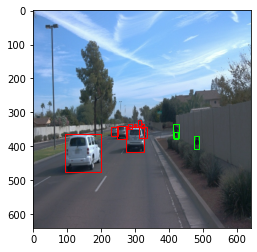

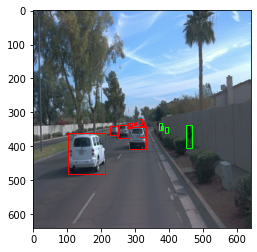

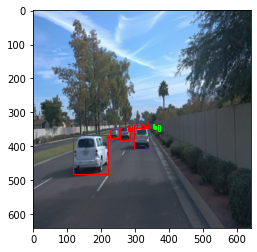

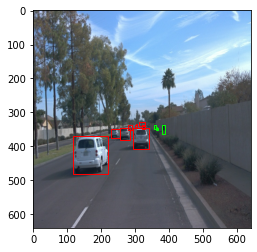

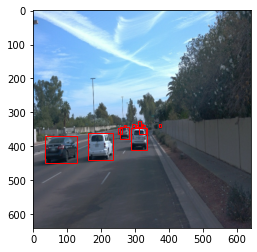

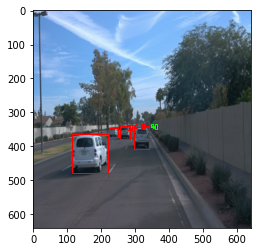

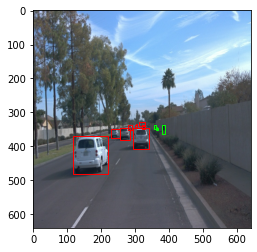

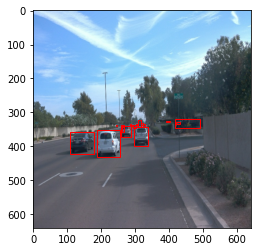

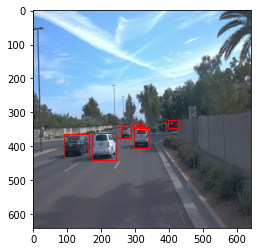

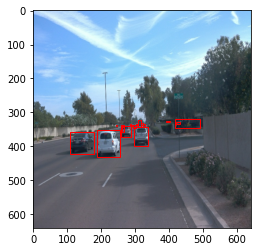

In [6]:
data_batch=dataset.take(10)
for i, record in enumerate(data_batch):
    display_instances(record)
    

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [9]:
dataset=get_dataset('/home/workspace/data/waymo/training_and_validation/*.tfrecord')
class_distribution=np.zeros(4,dtype=np.uint64)
for i,sample in dataset.enumerate():
    sample_classes=sample['groundtruth_classes'].numpy()
    uniques, counts=np.unique(sample_classes,return_counts=True)
    
    for j,unique in enumerate(uniques):
        class_distribution[unique-1]+=counts[j]
    if(i%1000==0):
        print(i.numpy())
    if(i.numpy()==100000): break
print(class_distribution)

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
[1799561  538229       0   13957]


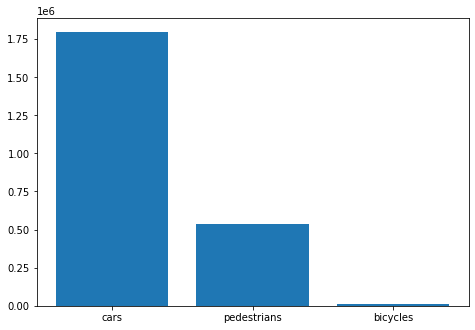

In [14]:
labels=['cars','pedestrians','bicycles']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,class_distribution[[0,1,3]])
plt.show()